In [43]:
import pandas as pd
from pandas.io.json import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import missingno as msno
import numpy as np
import scipy as sp
import os
import xgboost as xgb
#import visualization as vis
from pandas.plotting import scatter_matrix
%matplotlib inline

DIR_PATH = './'

In [4]:
train_raw = pd.read_csv(os.path.join(DIR_PATH, 'train.csv'), 
                        header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])
test_raw = pd.read_csv(os.path.join(DIR_PATH, 'test.csv'), 
                       header='infer', 
                       index_col='id',
                       parse_dates=['timestamp'])
macro = pd.read_csv(os.path.join(DIR_PATH, 'macro.csv'), 
                    header='infer')

In [55]:
train_cleaned = train_raw


## max_floor and floor

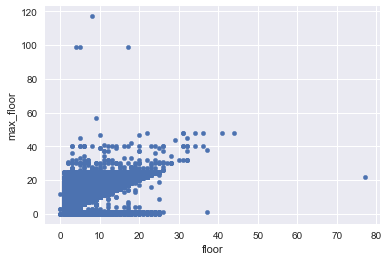

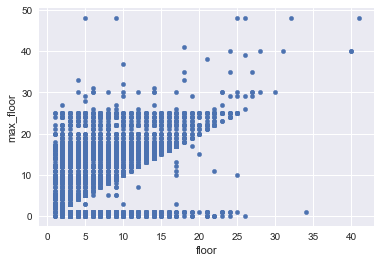

In [56]:
## floor / max_floor
train_cleaned.plot.scatter(x='floor', y='max_floor')

test_raw.plot.scatter(x='floor', y='max_floor')

In [57]:
## max_floor
train_cleaned.loc[train_cleaned['max_floor'] > 60]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
20725,2014-07-10,47,47.0,4.0,99.0,2.0,NaN,1.0,1.0,NaN,...,23,4,1,11,14,0,1,72,9,10238400
21737,2014-08-21,71,71.0,5.0,99.0,6.0,NaN,2.0,9.0,NaN,...,13,1,0,5,15,0,3,35,3,8484365
21855,2014-08-25,46,46.0,17.0,99.0,6.0,NaN,3.0,9.0,NaN,...,2,2,0,1,14,1,0,13,0,6670000
25943,2014-12-06,63,63.0,8.0,117.0,1.0,NaN,2.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,7239838


In [58]:
#modifying some max_floor 
train_cleaned.ix[train_cleaned['max_floor'] == 117, 'max_floor'] = 17
train_cleaned.ix[train_cleaned['max_floor'] > 60, 'max_floor'] = np.nan
train_cleaned.ix[train_cleaned['floor'] == 77, 'floor'] = 7

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [59]:
## max_floor has been modified 
train_cleaned.loc[train_cleaned['floor'] > 60]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,


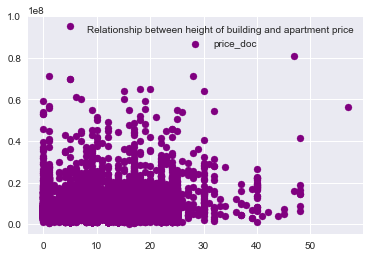

In [60]:
plt.scatter(x = "max_floor", y = "price_doc", data = train_cleaned, color = "purple")
plt.legend(title = "Relationship between height of building and apartment price")

## build_year

In [61]:
train_cleaned['build_year'].value_counts(dropna=False).sort_index()

 0.0             530
 1.0             368
 3.0               2
 20.0              1
 71.0              1
 215.0             1
 1691.0            1
 1860.0            2
 1876.0            1
 1886.0            1
 1890.0            5
 1895.0            1
 1896.0            2
 1900.0            2
 1904.0            1
 1905.0            1
 1906.0            1
 1907.0            2
 1910.0            5
 1911.0            1
 1912.0            5
 1914.0            3
 1915.0            5
 1917.0           16
 1920.0            1
 1924.0            3
 1925.0            1
 1926.0            8
 1927.0           10
 1928.0           12
               ...  
 1992.0          139
 1993.0          115
 1994.0          160
 1995.0          149
 1996.0          162
 1997.0          139
 1998.0          141
 1999.0          125
 2000.0          130
 2001.0          177
 2002.0          214
 2003.0          193
 2004.0          220
 2005.0          176
 2006.0          242
 2007.0          219
 2008.0      

In [62]:
#fixing impossible build_year(s)
train_cleaned.loc[train_cleaned['build_year'] == 20052009, 'build_year'] = 2009
train_cleaned.loc[train_cleaned['build_year'] == 4965, 'build_year'] = 1965
train_cleaned.loc[train_cleaned['build_year'] == 71, 'build_year'] = 1971
train_cleaned.loc[train_cleaned['build_year'] < 1800, 'build_year'] = np.nan

## full_sq 

In [63]:
## full_sq 
train_cleaned.loc[train_cleaned['full_sq'] > 300]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
129,2011-10-15,325,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,0,7,14,0,9,44,10,5000000
1481,2012-03-11,353,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,0,3,9,0,1,14,2,4750000
1613,2012-03-21,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,0,8,23,0,3,55,9,1050000
2428,2012-06-07,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,74,36,5,14,34,1,6,92,5,6117000
2783,2012-07-06,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,27,5,1,5,24,1,4,63,6,13250000
3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7,2,0,5,16,0,2,43,6,6868818
3599,2012-09-12,388,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,3899400
5947,2013-02-07,634,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,8,12,1,0,40,5,10200000
7210,2013-04-10,461,27.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,0,8,25,0,6,56,9,5750000


In [64]:
train_cleaned.loc[train_cleaned['full_sq'] > 1000, 'full_sq'] = train_cleaned.loc[train_cleaned['full_sq'] > 1000, 'full_sq']/100
train_cleaned.loc[train_cleaned['full_sq'] > 310, 'full_sq'] = train_cleaned.loc[train_cleaned['full_sq'] > 310, 'full_sq']/10


## "mosque_km"


In [65]:
train_cleaned[~np.isnan(train_cleaned.build_year)].sort_values('mosque_km') 
#lots of repeating values to the exact units

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
18639,2014-05-20,54.0,32.0,13.0,14.0,1.0,2001.0,2.0,9.0,3.0,...,1,1,0,2,8,1,0,19,2,8400000
18719,2014-05-21,56.0,30.0,15.0,24.0,6.0,2013.0,2.0,8.0,3.0,...,39,4,1,5,36,1,7,82,10,2000000
12900,2013-12-09,43.0,29.0,3.0,5.0,2.0,1961.0,2.0,5.0,2.0,...,344,131,22,147,232,2,99,183,15,10000000
23193,2014-10-01,30.0,18.0,1.0,5.0,2.0,1961.0,1.0,5.0,2.0,...,344,131,22,147,232,2,99,183,15,8700000
15903,2014-03-11,37.0,22.0,7.0,9.0,1.0,1962.0,2.0,7.0,3.0,...,39,4,1,5,36,1,7,82,10,2000000
19124,2014-05-30,51.0,30.0,16.0,17.0,1.0,2008.0,2.0,9.0,NaN,...,17,3,0,6,30,1,9,58,11,2000000
17896,2014-04-25,81.0,47.0,4.0,12.0,1.0,2003.0,3.0,10.0,2.0,...,1,0,0,2,8,1,0,19,2,2000000
26780,2014-12-18,76.0,47.0,7.0,12.0,1.0,2001.0,3.0,10.0,3.0,...,1,1,0,2,8,1,0,19,2,7000000
14118,2014-01-25,94.0,61.0,4.0,12.0,1.0,2001.0,4.0,10.0,2.0,...,1,1,0,2,8,1,0,19,2,12400000


In [66]:
np.isnan(train_cleaned.groupby('mosque_km').build_year.agg(['max'])).sum() #11851 rows × 1 columns including 2797 NAs 


max    2798
dtype: int64

In [67]:
imputed_years = train_cleaned.groupby('mosque_km').build_year.agg(['mean']).reset_index()
imputed_years.head()

,mosque_km,mean
0,0.005545,2001.0
1,0.011174,NaN
2,0.036309,2013.0
3,0.046984,1961.0
4,0.065479,1962.0


In [68]:
#Imputing build_year based on mosque_km on the total dataset 
imputed_years = train_cleaned.groupby('mosque_km').build_year.agg(['mean']).reset_index()
result = pd.merge(train_cleaned, imputed_years, how='outer', on=['mosque_km'])
result = result.rename(columns={'mean': 'build_year1'})
result = result.drop(['build_year','nuclear_reactor_km'], axis=1)
result = result.rename(columns={'build_year1': 'build_year'})


In [69]:
np.isnan(result.build_year).sum()/(result.shape[0]) #reduced NAs in build_year from ~43% to 12%

0.12077056873748811

In [70]:
#Exporting cleaned dataset to be sent to teammates/used in R. 
result.to_csv("cleaned_full_train.csv")

In [71]:
#Loading cleaned dataset for further EDA & cleaning
train = pd.read_csv("cleaned_full_train.csv")

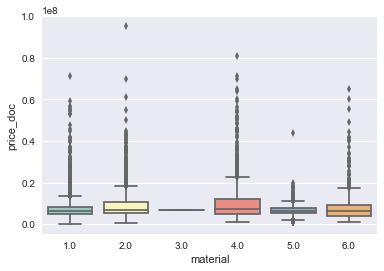

In [72]:
## material
col = 'material'
sns.boxplot(x=col, 
            y='price_doc', 
            data=train, 
            palette='Set3')

In [74]:
print(train[col].value_counts(dropna=False))

 1.0    14197
NaN      9572
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
 3.0        1
Name: material, dtype: int64


In [77]:
train.loc[train[col] == 3]
train.ix[train[col] == 3, col] = np.nan
train.loc[train[col] == 3] #worked 

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,build_year


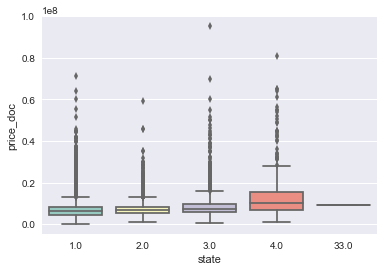

In [78]:
## state
sns.boxplot(x='state', 
            y='price_doc', 
            data=train, 
            palette='Set3')

In [80]:
print(train['state'].value_counts(dropna=False))

NaN      13559
 2.0      5844
 3.0      5790
 1.0      4855
 4.0       422
 33.0        1
Name: state, dtype: int64


In [82]:
## change 33 to 3
train.ix[train['state'] == 33, 'state'] = 3
train.loc[train['state'] == 33] #worked 

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,build_year


In [ ]:
## isolating groups of features & creating datasets with only these features
property_features = ['timestamp', 'full_sq', 'life_sq', 'floor', 
                     'max_floor', 'material', 'build_year', 'num_room',
                     'kitch_sq', 'state', 'product_type', 'sub_area', 
                     'price_doc']

important_features = ['full_sq', 'life_sq', 'floor', 
                     'max_floor', 'material', 'build_year', 'num_room',
                     'kitch_sq', 'state', "price_doc"]

neighborhood_features = ['green_part_500', 'prom_part_500', 'office_count_500', "office_sqm_500", 
                        "trc_count_500", "trc_sqm_500",'price_doc']

train_prop = train_raw[property_features]
#test = test_raw[property_features[:-1]]

train_important_features = train_raw[important_features]

train_nei = train_raw[neighborhood_features]

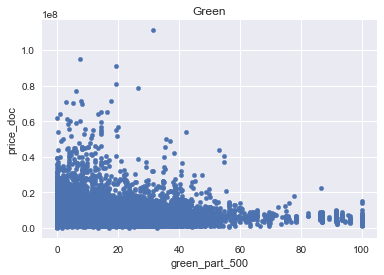

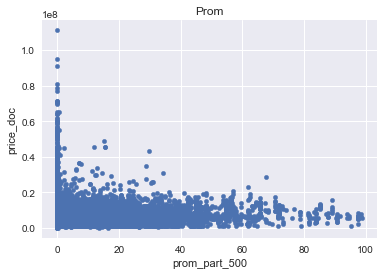

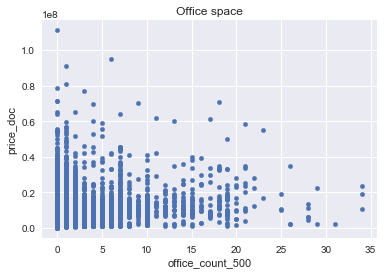

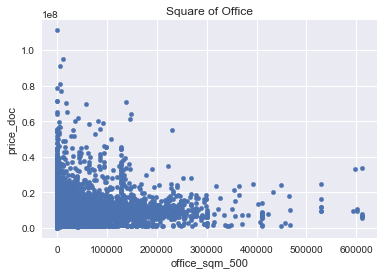

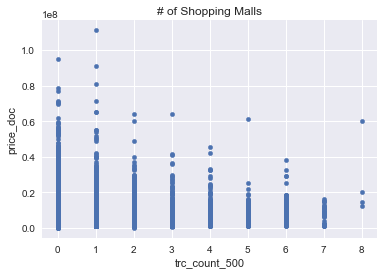

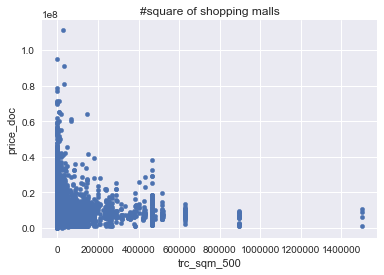

In [7]:
train_nei.plot.scatter(x= 'green_part_500', y='price_doc', title = "Green")
train_nei.plot.scatter(x='prom_part_500', y='price_doc', title = "Prom")
train_nei.plot.scatter(x='office_count_500', y='price_doc', title = "Office space")
train_nei.plot.scatter(x='office_sqm_500', y='price_doc', title = "Square of Office")
train_nei.plot.scatter(x='trc_count_500', y='price_doc', title = "# of Shopping Malls")
train_nei.plot.scatter(x='trc_sqm_500', y='price_doc', title = "#square of shopping malls")

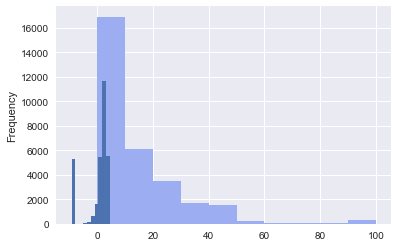

In [8]:
plt.hist(train_nei['green_part_500'], color = "#9caef1")
log_green = np.log(train_nei['green_part_500'] + 0.0001)
log_green.plot.hist()

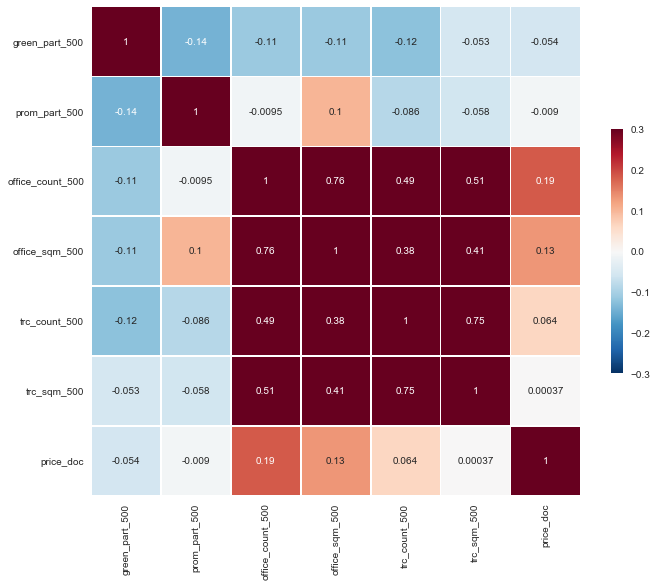

In [9]:
corr = train_nei.corr()

f, ax = plt.subplots(figsize=(11, 9))

#mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,annot = True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1110001d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10eed6dd8>]], dtype=object)

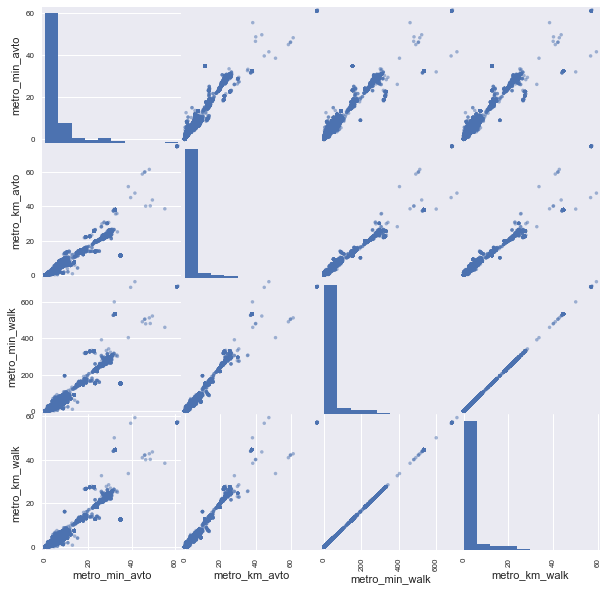

In [10]:
# metro_min_avto	Time to subway by car, min.
# metro_km_avto	Distance to subway by car, km
# metro_min_walk	Time to metro by foot
# metro_km_walk	Distance to the metro, km

subway_features = ["metro_min_avto", "metro_km_avto", "metro_min_walk", "metro_km_walk", "price_doc"]
train_subway = train_raw[subway_features]

scatter_matrix(train_subway.loc[:, ["metro_min_avto", "metro_km_avto", "metro_min_walk", "metro_km_walk"]], 
               figsize=(10, 10), 
               diagonal='hist')


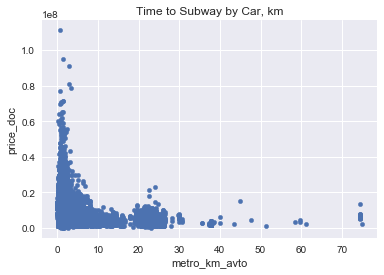

In [11]:
train_subway.plot.scatter(x= 'metro_km_avto', y='price_doc', title = "Time to Subway by Car, km")

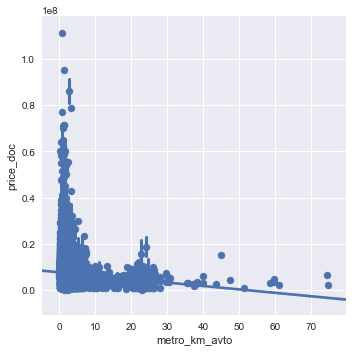

In [19]:
sns.lmplot(x= 'metro_km_avto', y='price_doc', data = train_subway, palette = "Set2", x_estimator=np.mean) #3sets 1-3
#Where are the points distributed? 

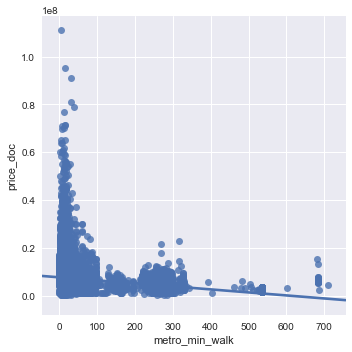

In [36]:
sns.lmplot(x= 'metro_min_walk', y='price_doc', data = train_subway, palette = "Set2")

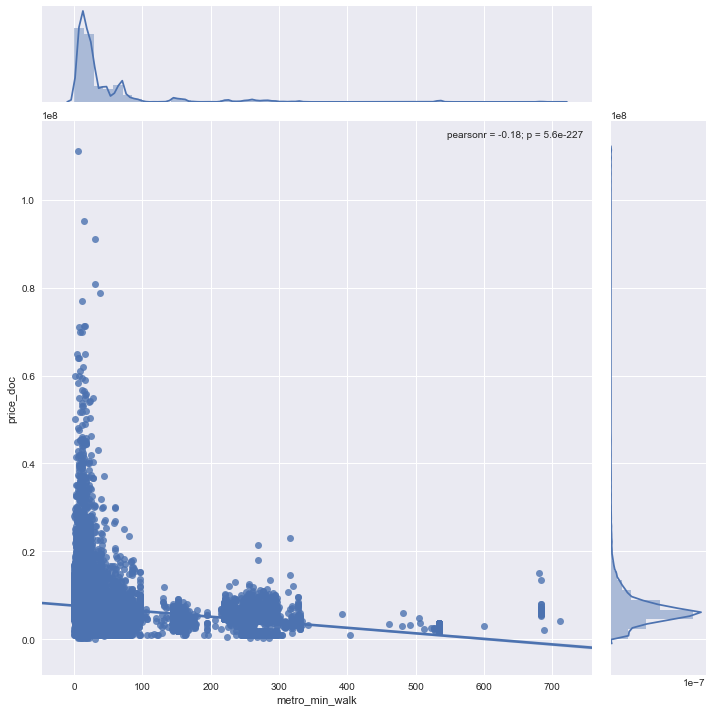

In [39]:
sns.jointplot(x='metro_min_walk', y='price_doc', data= train_subway, size = 10, kind = 'reg')

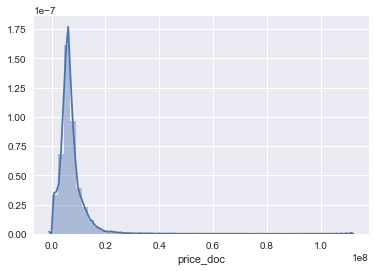

In [32]:
sns.distplot(train_subway['price_doc'])